In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

Text(0.5, 18.5, 'date')

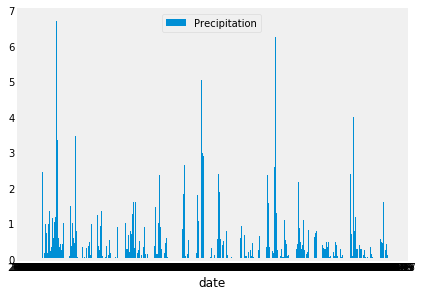

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
sel = [Measurement.date, Measurement.prcp]
date = dt.datetime(2016,8,23)
precipiation = session.query(*sel).filter(Measurement.date >= date)

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# # Save the query results as a Pandas DataFrame and set the index to the date column
last_yr_df = pd.DataFrame(precipiation)
last_yr_df.drop_duplicates("date")


# # Sort the dataframe by date


# # Use Pandas Plotting with Matplotlib to plot the data
pre_graph = plt.bar(last_yr_df["date"],last_yr_df["prcp"], label = "Precipitation")
plt.tight_layout()
plt.legend(loc = "upper center")
plt.grid()
plt.xlabel('date')

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
last_yr_df.set_index(last_yr_df["date"])
last_yr_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [13]:
# Design a query to show how many stations are available in this dataset?
session.query(Station).count()

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
count = func.count(Measurement.station)
active_stations = session.query(Measurement.station, count).group_by(Measurement.station).order_by(count.desc()).all()
active_stations
# List the stations and the counts in descending order.

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 

# highest temperature recorded, and average temperature of the most active station?

most_active_station = active_stations[0][0]
most_active_station
session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).filter(most_active_station==Measurement.station).one()


(54.0, 85.0, 71.66378066378067)

Text(0, 0.5, 'Frequency')

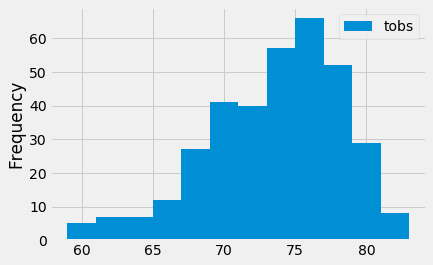

In [30]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date = dt.datetime(2016,8,23)
temperatures = session.query(Measurement.tobs).filter(Measurement.date >= date).filter(most_active_station==Measurement.station).all()
temperatures = [temp[0] for temp in temperatures]

plt.hist(temperatures,bins=12,label = "tobs")
plt.legend()
plt.ylabel("Frequency")